## Random Forest Regression on mRNA splicing efficiency

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

/home/ghristov/miniconda3/envs/mlp/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
gene_features = pd.read_csv(data_path, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(gene_features.shape[0],gene_features.shape[1]))

Number of data points: 117. Number of attributes: 101


In [3]:
gene_features.head(8)

,ORG,Gene,AUC,Gene len (bp),Exon1 len (bp),Exon2 len (bp),Intron len (bp),5ss-BP len (bp),BP-3ss len (bp),"ΔG per bp, intron",...,GUC,CUC,AGC,UGC,GGC,CGC,ACC,UCC,GCC,CCC
0,YFL039C,ACT1,0.481,1437,10,1118,309,266,44,-0.161,...,0.007,0.020,0.003,0.020,0.003,0.003,0.013,0.013,0.000,0.010
1,YDL029W,ARP2,0.235,1299,22,1154,123,109,15,-0.227,...,0.000,0.025,0.008,0.025,0.017,0.000,0.017,0.000,0.017,0.033
2,YML036W,CGI121,0.740,652,456,90,106,65,42,-0.092,...,0.000,0.010,0.010,0.000,0.000,0.000,0.029,0.010,0.010,0.000
3,YBL059C-A,CMC2,0.856,415,34,296,85,57,29,-0.074,...,0.000,0.024,0.000,0.024,0.000,0.000,0.000,0.036,0.012,0.024
4,YKL190W,CNB1,0.499,604,52,476,76,58,19,-0.143,...,0.000,0.000,0.000,0.000,0.000,0.000,0.014,0.000,0.000,0.000
5,YLL050C,COF1,0.483,611,14,418,179,47,133,-0.228,...,0.006,0.028,0.006,0.011,0.000,0.006,0.000,0.023,0.006,0.006
6,YIL111W,COX5B,0.219,544,1,455,88,57,32,-0.125,...,0.000,0.000,0.012,0.012,0.000,0.000,0.000,0.012,0.000,0.000
7,YNL130C,CPT1,0.586,1274,50,1132,92,58,35,-0.076,...,0.000,0.000,0.000,0.022,0.011,0.000,0.011,0.000,0.000,0.011


In [3]:
X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y = gene_features['AUC']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

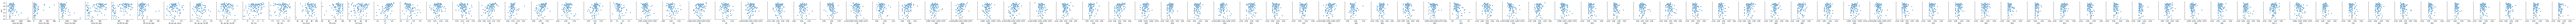

In [6]:
variable_names = X.columns.values
sns.pairplot(gene_features, x_vars=variable_names, y_vars='AUC')

In [ ]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

In [ ]:
lr = LinearRegression()
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
predictions = cross_val_predict(lr,X,y=y,cv=kf)

print('Coefficient of determination: {}'.format(r2_score(y, predictions)))
print('Mean absolute error: {}'.format(mean_absolute_error(y, predictions)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions))))

In [6]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)
print('\n')
rfr = RandomForestRegressor()
predictions_rfr = cross_val_predict(rfr,X,y=y,cv=kf)

print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr)))



RandomForestRegressor R^2: 0.2621596254502958
RandomForestRegressor MAE: 0.14414871794871795
RandomForestRegressor RMSE: 0.19616795960622208
RandomForestRegressor CC: 
[[ 1.          0.53265764]
 [ 0.53265764  1.        ]]


Importance of feature Gene len (bp), DT: 0.000, RF: 0.020
Importance of feature Exon1 len (bp), DT: 0.000, RF: 0.006
Importance of feature Exon2 len (bp), DT: 0.000, RF: 0.019
Importance of feature Intron len (bp), DT: 0.327, RF: 0.050
Importance of feature 5ss-BP len (bp), DT: 0.004, RF: 0.046
Importance of feature BP-3ss len (bp), DT: 0.000, RF: 0.007
Importance of feature ΔG per bp, intron, DT: 0.133, RF: 0.015
Importance of feature ΔG  per bp, 5ss-BP, DT: 0.004, RF: 0.020
Importance of feature ΔG  per bp, 3ss-BP, DT: 0.000, RF: 0.003
Importance of feature ΔG, 5ss, DT: 0.000, RF: 0.023
Importance of feature ΔG, 3ss, DT: 0.008, RF: 0.008
Importance of feature 5ss Score, DT: 0.000, RF: 0.008
Importance of feature BP score, DT: 0.000, RF: 0.004
Importance of feature 3ss Score, DT: 0.065, RF: 0.005
Importance of feature A, DT: 0.184, RF: 0.070
Importance of feature U, DT: 0.000, RF: 0.047
Importance of feature G, DT: 0.003, RF: 0.008
Importance of feature C, DT: 0.000, RF: 0.006
Importa

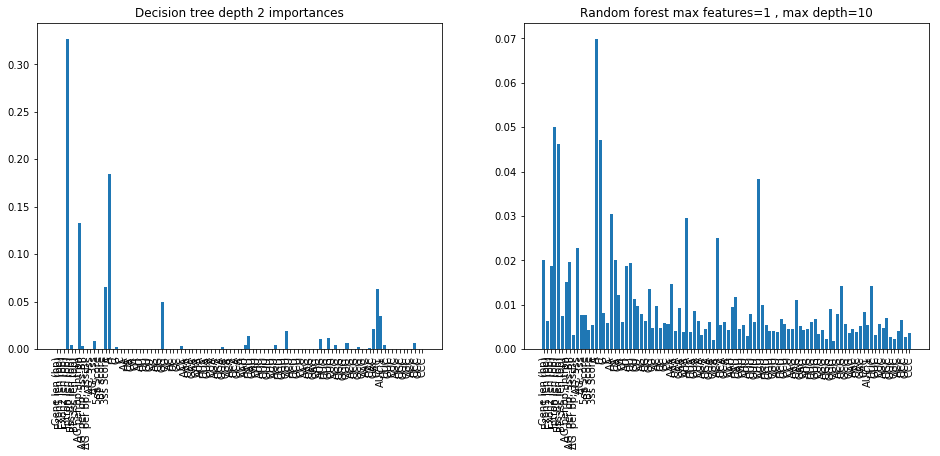

In [16]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=15, random_state=1337)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=500, 
                            criterion='mse', 
                            max_features=15, 
                            max_depth=15, 
                            n_jobs=2,
                            random_state=1337)
rf.fit(X_train, y_train)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
xx = np.arange(len(dt.feature_importances_))
ax1.bar(xx, dt.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Decision tree depth 2 importances')
ax2.bar(xx, rf.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forest max features=1 , max depth=10')

for i, column in enumerate(gene_features.drop(['ORG','Gene','AUC'], axis=1)):
    print('Importance of feature {}, DT: {:.3f}, RF: {:.3f}'.format(column, dt.feature_importances_[i], rf.feature_importances_[i]))

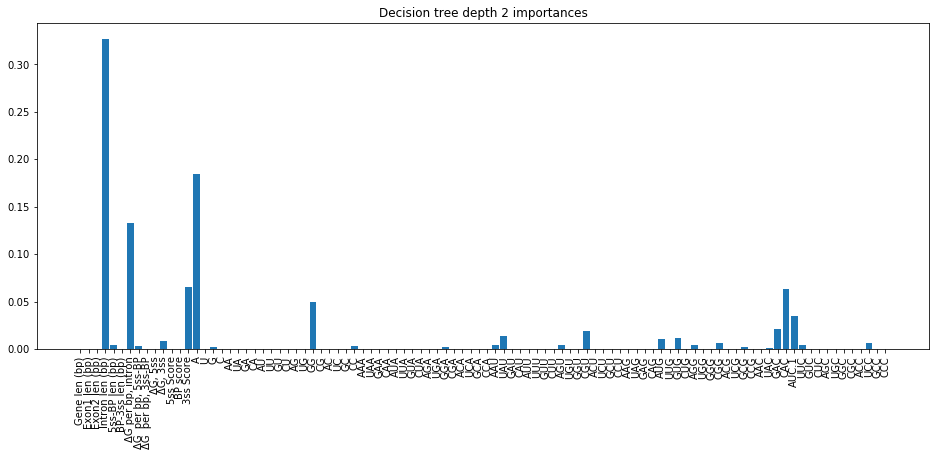

In [14]:
fig, ax1 = plt.subplots(figsize=(16,6))
xx = np.arange(len(dt.feature_importances_))
ax1.bar(xx, dt.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Decision tree depth 2 importances')

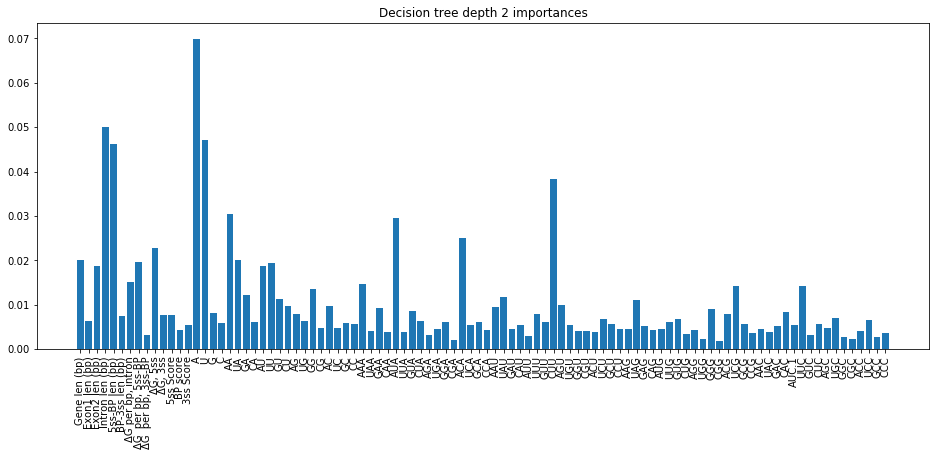

In [17]:
fig, ax1 = plt.subplots(figsize=(16,6))
xx = np.arange(len(rf.feature_importances_))
ax1.bar(xx, rf.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Decision tree depth 2 importances')